In [143]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import pylab as plt
import seaborn

In [163]:
# calculates Returns, Mean Returns, the Covariance Matrix & the Correlation Coefficient


stockList = []
stockReturns = []
stockMeanReturns = []
covarianceMatrix = []

#get and calculate the above Data

def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    corr_df = stockData.corr(method='pearson')
        
    stockList.append(stockData)    
    stockReturns.append(returns)
    stockMeanReturns.append(meanReturns)    
    covarianceMatrix.append(covMatrix)
 
    
    
    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = True
    seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    plt.show()

[*********************100%***********************]  3 of 3 completed


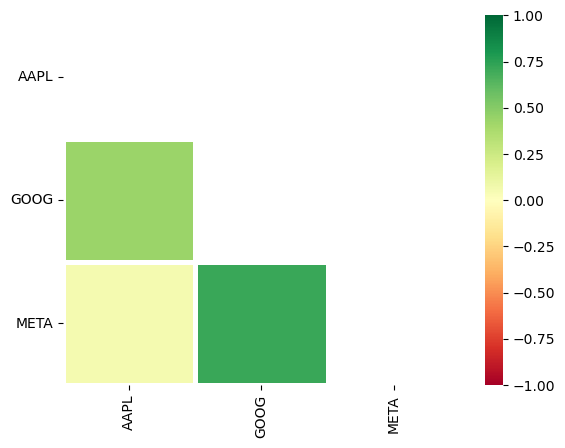

In [164]:
stocks = ['GOOG', 'AAPL', 'META']
startDate = '2021-01-01'
endDate = '2023-10-08'

getData(stocks, startDate, endDate)

  #take the bottom triangle since it repeats itself
 mask = np.zeros_like(corr_df)
 mask[np.triu_indices_from(mask)] = True
 #generate plot
 seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 plt.yticks(rotation=0) 
 plt.xticks(rotation=90) 
 plt.show()

In [166]:
# Monte Carlo Simulation - Inputs

n = 1048
simDays = 260

#portfolio Distribution
portfolioWeights = np.ones(len(stocks))
portfolioWeights = portfolioWeights* (1/ len(stocks))

In [226]:
#Monte Carlo Simulation

#Portfolio Returns

portfolioMeanReturn = np.sum(stockMeanReturns * portfolioWeights)

#Calculate Portfolio Variance 

portfolioVariances = []

def portfolioVariance(covariance, weights):
        for i in range(len(stocks)):
            for j in range(len(stocks)):
                if i == j:
                    cov1 = weights[i] * weights[j] * covariance[0][stocks[i]][stocks[j]]
                    portfolioVariances.append(cov1)
                if i < j:
                    continue
                else:
                    cov1 = 2* weights[i] * weights[j] * covariance[0][stocks[i]][stocks[j]]
                    portfolioVariances.append(cov1)
                    
#Call Function

portfolioVariance(covarianceMatrix, portfolioWeights)

portfolioVariance = np.sum(portfolioVariances)

#Calculate Portfolio Covariance

portfolioCovariances = []

def portfolioCovariance(covariance, weights):
            for i in range(len(stocks)):
                for j in range(i+ 1, len(stocks)):
                    cov1 = 2* weights[i] * weights[j] * covariance[0][stocks[i]][stocks[j]]
                    portfolioCovariances.append(cov1)
                        
#Call Function

portfolioCovariance(covarianceMatrix, portfolioWeights)
portfolioCovariance = np.sum(portfolioCovariances)
    

In [227]:
portfolioVariances

[4.619163134173397e-05,
 9.238326268346794e-05,
 5.5636321627425045e-05,
 3.6873567861798793e-05,
 7.374713572359759e-05,
 9.064184736812607e-05,
 6.944947304163134e-05,
 0.00010755342104947894,
 0.00021510684209895788]

In [225]:
portfolioCovariance
    

0.00021572764203718246

In [193]:
covarianceMatrix

[          AAPL      GOOG      META
 AAPL  0.000332  0.000250  0.000313
 GOOG  0.000250  0.000416  0.000408
 META  0.000313  0.000408  0.000968]